In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',index_col='Quarter',parse_dates=True)
data

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [7]:
data.isna().sum()

Sales    0
dtype: int64

<AxesSubplot:xlabel='Quarter'>

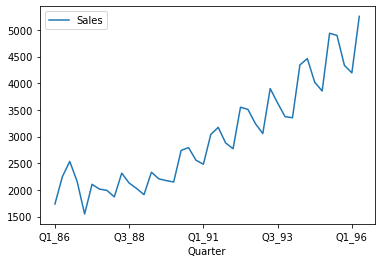

In [4]:
data.plot()

In [8]:
data.index.freq = 'MS'
data.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

## Simple Exponential Smoothing

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [12]:
alpha = 0.5
model_ses12=SimpleExpSmoothing(data['Sales'])
fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
data['SES12'] = fitted_model.fittedvalues.shift(-1)
data.head()

,Sales,SES12
Quarter,,
Q1_86,1734.827000,1734.827000
Q2_86,2244.960999,1989.893999
Q3_86,2533.804993,2261.849496
Q4_86,2154.962997,2208.406247
Q1_87,1547.818996,1878.112622


## Double Exponential Smoothing

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12 = ExponentialSmoothing(data['Sales'], trend='add')
fitted_model= mod_add12.fit()
data['DESadd12'] = fitted_model.fittedvalues.shift(-1)
data.head()

,Sales,SES12,DESadd12
Quarter,,,
Q1_86,1734.827000,1734.827000,1784.887108
Q2_86,2244.960999,1989.893999,2043.596646
Q3_86,2533.804993,2261.849496,2379.806397
Q4_86,2154.962997,2208.406247,2409.542734
Q1_87,1547.818996,1878.112622,2077.445592


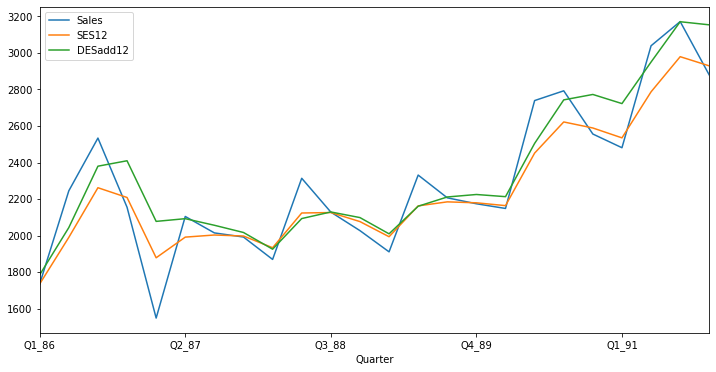

In [14]:
data[['Sales','SES12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

In [15]:
data['DESmul12'] = ExponentialSmoothing(data['Sales'], trend='mul').fit().fittedvalues.shift(-1)
data.head()

,Sales,SES12,DESadd12,DESmul12
Quarter,,,,
Q1_86,1734.827000,1734.827000,1784.887108,2428.747232
Q2_86,2244.960999,1989.893999,2043.596646,2798.268432
Q3_86,2533.804993,2261.849496,2379.806397,3117.019164
Q4_86,2154.962997,2208.406247,2409.542734,2844.087559
Q1_87,1547.818996,1878.112622,2077.445592,2099.342118


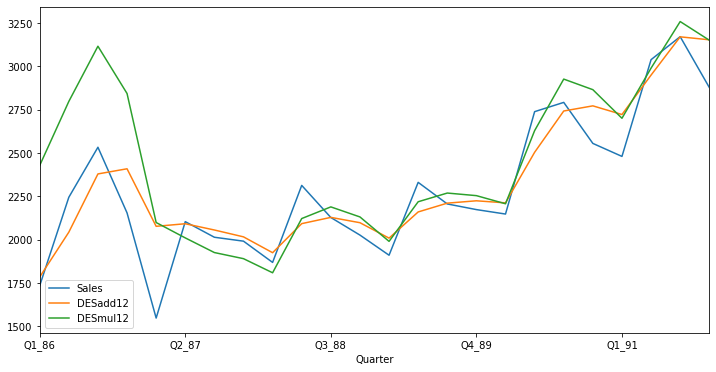

In [16]:
data[['Sales','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

## Triple Exponential Smoothing

In [17]:
data['TESadd12'] = ExponentialSmoothing(data['Sales'],trend='add',seasonal='add',seasonal_periods=4).fit().fittedvalues
data.head()

,Sales,SES12,DESadd12,DESmul12,TESadd12
Quarter,,,,,
Q1_86,1734.827000,1734.827000,1784.887108,2428.747232,1745.539061
Q2_86,2244.960999,1989.893999,2043.596646,2798.268432,2216.342147
Q3_86,2533.804993,2261.849496,2379.806397,3117.019164,2450.929772
Q4_86,2154.962997,2208.406247,2409.542734,2844.087559,2329.427352
Q1_87,1547.818996,1878.112622,2077.445592,2099.342118,1724.795836


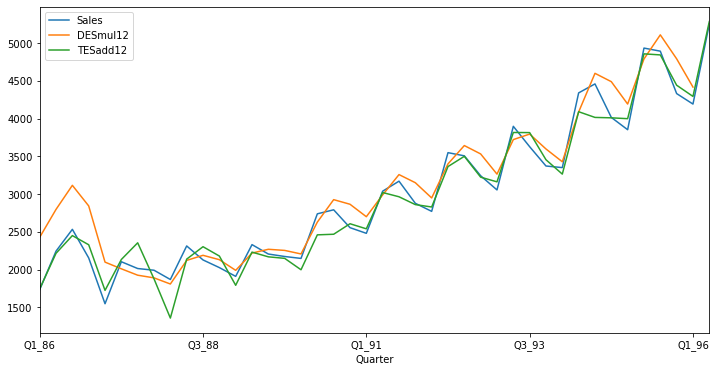

In [18]:
data[['Sales','DESmul12','TESadd12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

In [19]:
data['TESmul12'] = ExponentialSmoothing(data['Sales'],trend='mul',seasonal='mul',seasonal_periods=4).fit().fittedvalues
data.head()

,Sales,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Quarter,,,,,,
Q1_86,1734.827000,1734.827000,1784.887108,2428.747232,1745.539061,1838.134975
Q2_86,2244.960999,1989.893999,2043.596646,2798.268432,2216.342147,2251.575594
Q3_86,2533.804993,2261.849496,2379.806397,3117.019164,2450.929772,2426.622600
Q4_86,2154.962997,2208.406247,2409.542734,2844.087559,2329.427352,2231.490904
Q1_87,1547.818996,1878.112622,2077.445592,2099.342118,1724.795836,1713.334051


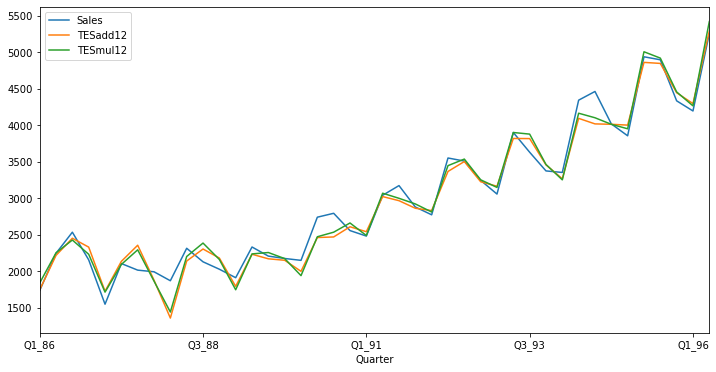

In [20]:
data[['Sales','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

## Model Evaluation

In [21]:
data['rmse_ses12'] = np.sqrt(np.mean((data['Sales']-data['SES12'])**2))

In [22]:
data['rmse_DESadd12'] = np.sqrt(np.mean((data['Sales']-data['DESadd12'])**2))

In [23]:
data['rmse_DESmul12'] = np.sqrt(np.mean((data['Sales']-data['DESmul12'])**2))

In [24]:
data['rmse_TESadd12'] = np.sqrt(np.mean((data['Sales']-data['TESadd12'])**2))

In [25]:
data['rmse_TESmul12'] = np.sqrt(np.mean((data['Sales']-data['TESmul12'])**2))

In [26]:
data.head()

,Sales,SES12,DESadd12,DESmul12,TESadd12,TESmul12,rmse_ses12,rmse_DESadd12,rmse_DESmul12,rmse_TESadd12,rmse_TESmul12
Quarter,,,,,,,,,,,
Q1_86,1734.827000,1734.827000,1784.887108,2428.747232,1745.539061,1838.134975,193.307148,228.12992,285.863392,172.115779,155.741942
Q2_86,2244.960999,1989.893999,2043.596646,2798.268432,2216.342147,2251.575594,193.307148,228.12992,285.863392,172.115779,155.741942
Q3_86,2533.804993,2261.849496,2379.806397,3117.019164,2450.929772,2426.622600,193.307148,228.12992,285.863392,172.115779,155.741942
Q4_86,2154.962997,2208.406247,2409.542734,2844.087559,2329.427352,2231.490904,193.307148,228.12992,285.863392,172.115779,155.741942
Q1_87,1547.818996,1878.112622,2077.445592,2099.342118,1724.795836,1713.334051,193.307148,228.12992,285.863392,172.115779,155.741942
